In [1]:
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.manifold import TSNE
import graphviz

sns.set_theme(style="white", palette="Set2", font_scale=1.5, rc={'figure.figsize': (11.7,8.27)})
X_train, y_train, feature_names, label_names = load_dataset('birds', 'train')
X_test, y_test, _, _ = load_dataset('birds', 'test')

birds:train - exists, not redownloading
birds:test - exists, not redownloading


## Contain labels or not

In [2]:
# training set
zz_string=[]
zz_num=[]
y_sum = np.sum(y_train.todense(),axis=1)
for i in range(len(y_train.todense())):
    if np.sum(y_sum[i]) > 0:
        zz_string.append("has label")
        zz_num.append(1)
    else:
        zz_string.append("no label")
        zz_num.append(-1)
        
# testing set
zz_test_string=[]
zz_test_num=[]
y_test_sum = np.sum(y_test.todense(),axis=1)
for i in range(len(y_test.todense())):
    if np.sum(y_test_sum[i]) > 0:
        zz_test_string.append("has label")
        zz_test_num.append(1)
    else:
        zz_test_string.append("no label")
        zz_test_num.append(-1)

## Label Space Visualization

In [3]:
data_set_label = pd.DataFrame(y_train.todense(),columns=[label_names[x][0] for x in range(y_train.shape[1])])
t_sne = TSNE()
t_sne.fit(data_set_label)
t_sne = pd.DataFrame(t_sne.embedding_, columns=["v1","v2"], index=data_set_label.index)
t_sne["label_exist"]=zz_string

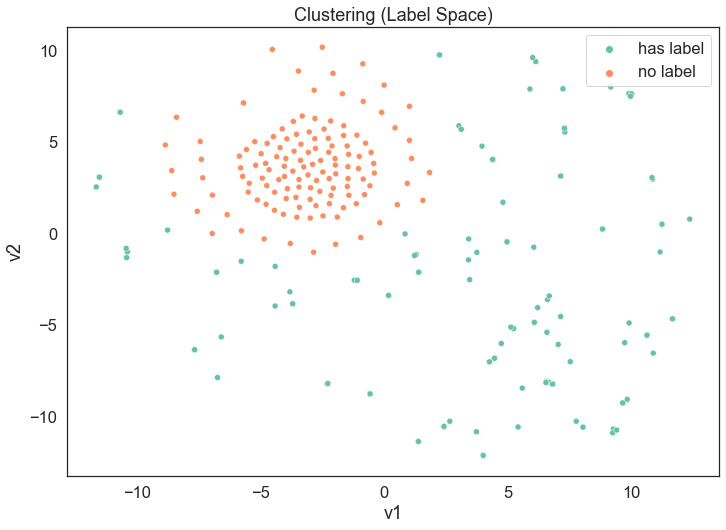

In [4]:
ax1 = sns.scatterplot(data=t_sne, x="v1", y="v2",hue="label_exist")
ax1.set_title("Clustering (Label Space)")
ax1.legend(loc="upper right")

## Feature Space Visualization

In [27]:
data_set_feature = pd.DataFrame(X_train.todense(),columns=[feature_names[x][0] for x in range(X_train.shape[1])])
from sklearn.manifold import TSNE
t_sne = TSNE()
t_sne.fit(data_set_feature)
t_sne = pd.DataFrame(t_sne.embedding_, columns=["v1","v2"], index=data_set_feature.index)
t_sne["label_exist"]=zz_string

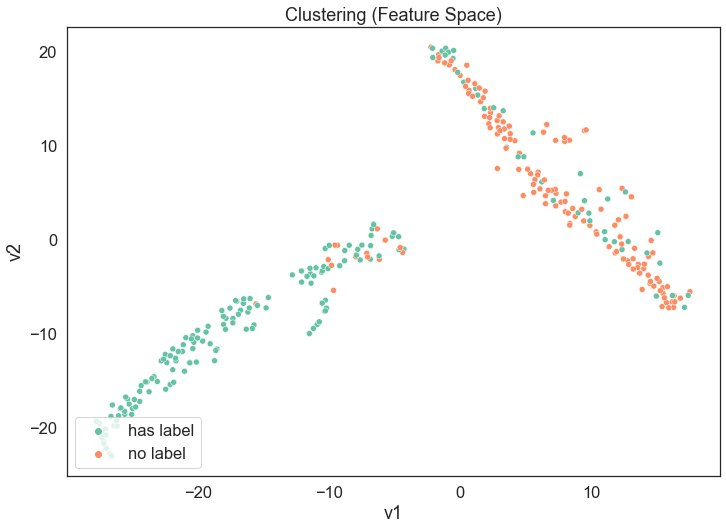

In [28]:
ax1 = sns.scatterplot(data=t_sne, x="v1", y="v2",hue="label_exist")
ax1.set_title("Clustering (Feature Space)")
ax1.legend(loc="lower left")

# Binary Classification (Containing labels vs Not containing labels)

In [7]:
print([feature_names[x][0] for x in range(X_train.shape[1])])

['audio-ssd1', 'audio-ssd2', 'audio-ssd3', 'audio-ssd4', 'audio-ssd5', 'audio-ssd6', 'audio-ssd7', 'audio-ssd8', 'audio-ssd9', 'audio-ssd10', 'audio-ssd11', 'audio-ssd12', 'audio-ssd13', 'audio-ssd14', 'audio-ssd15', 'audio-ssd16', 'audio-ssd17', 'audio-ssd18', 'audio-ssd19', 'audio-ssd20', 'audio-ssd21', 'audio-ssd22', 'audio-ssd25', 'audio-ssd26', 'audio-ssd27', 'audio-ssd28', 'audio-ssd29', 'audio-ssd30', 'audio-ssd31', 'audio-ssd32', 'audio-ssd33', 'audio-ssd34', 'audio-ssd35', 'audio-ssd36', 'audio-ssd37', 'audio-ssd38', 'audio-ssd39', 'audio-ssd40', 'audio-ssd41', 'audio-ssd42', 'audio-ssd43', 'audio-ssd44', 'audio-ssd45', 'audio-ssd46', 'audio-ssd49', 'audio-ssd50', 'audio-ssd51', 'audio-ssd52', 'audio-ssd53', 'audio-ssd54', 'audio-ssd55', 'audio-ssd56', 'audio-ssd57', 'audio-ssd58', 'audio-ssd59', 'audio-ssd60', 'audio-ssd61', 'audio-ssd62', 'audio-ssd63', 'audio-ssd64', 'audio-ssd65', 'audio-ssd66', 'audio-ssd67', 'audio-ssd68', 'audio-ssd69', 'audio-ssd70', 'audio-ssd73', 'au

## Using Audio Features

### Feature Selection (audio)

In [8]:
# training set
df_x = pd.DataFrame(X_train.todense(),columns=[feature_names[x][0] for x in range(X_train.shape[1])])
df_y = zz_num
# training set
df_x_test = pd.DataFrame(X_test.todense(),columns=[feature_names[x][0] for x in range(X_train.shape[1])])
df_y_test = zz_test_num
audio_features=list(filter(lambda k: 'audio' in k, df_x.columns.tolist()))
df_x = df_x.filter(items=audio_features)
df_x_test = df_x_test.filter(items=audio_features)

### Decision Tree (audio)

In [29]:
# fit
clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_leaf=10,max_features="log2")
clf.fit(df_x,df_y)
# predict
df_y_test_predict=clf.predict(df_x_test)
# f1 score
print("Precision:",precision_score(df_y_test, df_y_test_predict))
print("Recall:",recall_score(df_y_test, df_y_test_predict))
print("F1-Score:",f1_score(df_y_test, df_y_test_predict))
# visualize tree
dot_comp = tree.export_graphviz(clf, out_file=None, feature_names=df_x.columns,
                                class_names=["no label","has label"],filled=True, rounded=True) 
graph = graphviz.Source(dot_comp) 
graph.render("birds_decision_tree_audio")

Precision: 0.9338235294117647
Recall: 0.7383720930232558
F1-Score: 0.8246753246753247


'birds_decision_tree_audio.pdf'

### SVM (audio)

In [17]:
# fit
clf=SVC()
clf.fit(df_x,df_y)
# predict
df_y_test_predict=clf.predict(df_x_test)
# metrics
print("Precision:",precision_score(df_y_test, df_y_test_predict))
print("Recall:",recall_score(df_y_test, df_y_test_predict))
print("F1-Score:",f1_score(df_y_test, df_y_test_predict))

Precision: 0.6650943396226415
Recall: 0.8197674418604651
F1-Score: 0.734375


## Using Cluster Features

### Feature Selection (cluster)

In [18]:
# training set
df_x = pd.DataFrame(X_train.todense(),columns=[feature_names[x][0] for x in range(X_train.shape[1])])
df_y = zz_num
# training set
df_x_test = pd.DataFrame(X_test.todense(),columns=[feature_names[x][0] for x in range(X_train.shape[1])])
df_y_test = zz_test_num
cluster_features=list(filter(lambda k: 'cluster' in k, df_x.columns.tolist()))
df_x = df_x.filter(items=cluster_features)
df_x_test = df_x_test.filter(items=cluster_features)

### Decision Tree (cluster)

In [19]:
# fit
clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_leaf=10,max_features="log2")
clf.fit(df_x,df_y)
# predict
df_y_test_predict=clf.predict(df_x_test)
# metrics
print("Precision:",precision_score(df_y_test, df_y_test_predict))
print("Recall:",recall_score(df_y_test, df_y_test_predict))
print("F1-Score:",f1_score(df_y_test, df_y_test_predict))
# visualize tree
dot_comp = tree.export_graphviz(clf, out_file=None, feature_names=df_x.columns,
                                class_names=["no label","has label"],filled=True, rounded=True) 
graph = graphviz.Source(dot_comp) 
graph.render("birds_decision_tree_cluster")

Precision: 0.5325077399380805
Recall: 1.0
F1-Score: 0.694949494949495


'birds_decision_tree_cluster.pdf'

### SVM (cluster)

In [20]:
# fit
clf=SVC()
clf.fit(df_x,df_y)
# predict
df_y_test_predict=clf.predict(df_x_test)
# metrics
print("Precision:",precision_score(df_y_test, df_y_test_predict))
print("Recall:",recall_score(df_y_test, df_y_test_predict))
print("F1-Score:",f1_score(df_y_test, df_y_test_predict))

Precision: 0.9276315789473685
Recall: 0.8197674418604651
F1-Score: 0.8703703703703705


## Using All Features

### Feature Selection (all)

In [22]:
# training set
df_x = pd.DataFrame(X_train.todense(),columns=[feature_names[x][0] for x in range(X_train.shape[1])])
df_y = zz_num
# training set
df_x_test = pd.DataFrame(X_test.todense(),columns=[feature_names[x][0] for x in range(X_train.shape[1])])
df_y_test = zz_test_num

### SVM (all)

In [23]:
# fit
clf=SVC()
clf.fit(df_x,df_y)
# predict
df_y_test_predict=clf.predict(df_x_test)
# metrics
print("Precision:",precision_score(df_y_test, df_y_test_predict))
print("Recall:",recall_score(df_y_test, df_y_test_predict))
print("F1-Score:",f1_score(df_y_test, df_y_test_predict))

Precision: 0.9904761904761905
Recall: 0.6046511627906976
F1-Score: 0.7509025270758123


In [24]:
df_x.head()

,audio-ssd1,audio-ssd2,audio-ssd3,audio-ssd4,audio-ssd5,audio-ssd6,audio-ssd7,audio-ssd8,audio-ssd9,audio-ssd10,...,cluster100,segments,mean_rect_width,std_rect_width,mean_rect_height,std_rect_height,mean_rect_volume,std_rect_volume,hasSegments,location
0,0.016521,0.039926,0.089632,0.134119,0.170470,0.176872,0.171546,0.182392,0.162482,0.159083,...,0.0,13.0,16.384615,20.617394,46.769231,71.863118,788.923077,1761.802180,1.0,2.0
1,0.006600,0.035984,0.089956,0.123214,0.172273,0.177068,0.165507,0.179655,0.161744,0.163678,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
2,0.006894,0.017722,0.048062,0.065802,0.103443,0.091397,0.084931,0.088666,0.075676,0.074408,...,0.0,2.0,24.000000,2.828427,28.000000,1.414214,674.000000,113.137085,1.0,2.0
3,0.031046,0.127675,0.221428,0.272707,0.358743,0.349389,0.316029,0.330656,0.310752,0.306288,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
4,0.064721,0.226644,0.304482,0.274662,0.346980,0.334063,0.307223,0.324666,0.297070,0.292258,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
